In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [114]:
df = pd.read_csv('datasets/gym_members_exercise_tracking.csv')
df_2 = df.copy()

df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


### General Info Of The Dataframe

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### Check NULL Values

In [105]:
# check null values
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

### Check Duplicated Rows

In [106]:
df.duplicated().sum()

np.int64(0)

### Categorize People

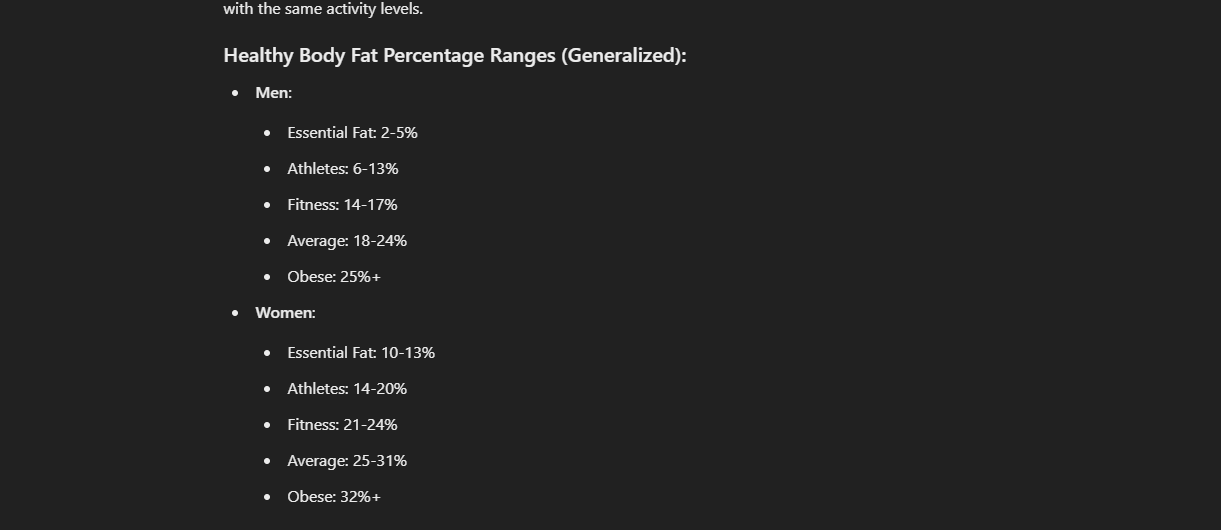

In [107]:
def categorize_fat(row):
    # Male
    if row['Gender'] == 'Male':
        if row['Fat_Percentage'] >= 2 and row['Fat_Percentage'] <= 5:
            return 'Essential Fat'
        elif row['Fat_Percentage'] >= 6 and row['Fat_Percentage'] <= 13:
            return 'Super Lean'
        elif row['Fat_Percentage'] >= 14 and row['Fat_Percentage'] <= 17:
            return 'Lean'
        elif row['Fat_Percentage'] >= 18 and row['Fat_Percentage'] <= 24:
            return 'Average'
        else:
            return 'High Fat'
    # Female
    else:
        if row['Fat_Percentage'] >= 10 and row['Fat_Percentage'] <= 13:
            return 'Essential Fat'
        elif row['Fat_Percentage'] >= 14 and row['Fat_Percentage'] <= 20:
            return 'Super Lean'
        elif row['Fat_Percentage'] >= 21 and row['Fat_Percentage'] <= 24:
            return 'Lean'
        elif row['Fat_Percentage'] >= 25 and row['Fat_Percentage'] <= 31:
            return 'Average'
        else:
            return 'High Fat'

df['Fat_category'] = df.apply(categorize_fat, axis=1) 
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Fat_category
916,22,Male,117.3,1.68,172,134,57,1.24,914.0,Yoga,28.5,2.7,3,2,41.56,High Fat
923,52,Female,70.6,1.58,181,164,67,1.02,753.0,HIIT,34.9,2.0,3,2,28.28,High Fat
524,36,Male,112.4,1.63,164,135,58,1.02,757.0,Cardio,25.0,3.4,4,2,42.30,High Fat
496,49,Male,82.3,1.84,192,146,71,1.29,932.0,Strength,28.4,3.4,4,2,24.31,High Fat
392,54,Female,66.9,1.74,195,129,62,1.24,720.0,HIIT,29.5,2.1,2,1,22.10,Average
284,34,Female,74.2,1.57,178,158,52,1.47,1161.0,Cardio,32.7,2.4,3,1,30.10,High Fat
367,39,Female,63.3,1.71,178,125,56,1.88,1175.0,Strength,18.5,2.7,4,3,21.65,Super Lean
213,20,Female,71.3,1.69,167,163,52,1.28,1043.0,Strength,33.4,2.3,3,2,24.96,High Fat
65,48,Female,67.1,1.61,160,151,74,0.62,421.0,Cardio,33.4,1.5,2,1,25.89,High Fat
714,56,Male,109.6,1.66,188,166,66,1.29,1060.0,Cardio,20.5,3.1,3,2,39.77,Average


### Pie Chart

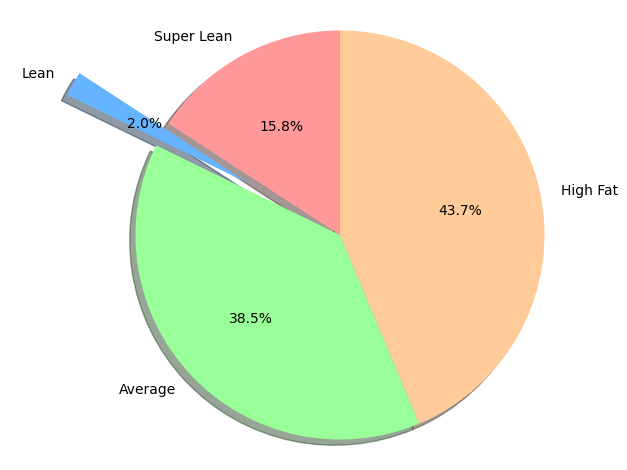

In [108]:
# Calculate counts for each category
super_lean = df.loc[df['Fat_category'] == 'Super Lean'].shape[0]
lean = df.loc[df['Fat_category'] == 'Lean'].shape[0]
average = df.loc[df['Fat_category'] == 'Average'].shape[0]
high_fat = df.loc[df['Fat_category'] == 'High Fat'].shape[0]

# Pie chart
labels = ['Super Lean', 'Lean', 'Average', 'High Fat']
sizes = [super_lean, lean, average, high_fat]
explodes = (0, 0.5, 0, 0)

# Add colors and explode for visualization
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explodes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [109]:
strength_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Strength'] / df['Session_Duration (hours)']).mean()
print("Strength : ", strength_avg_cal)

cardio_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Cardio'] / df['Session_Duration (hours)']).mean()
print("Cardio : ", cardio_avg_cal)

yoga_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Yoga'] / df['Session_Duration (hours)']).mean()
print("Yoga : ", yoga_avg_cal)

hiit_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'HIIT'] / df['Session_Duration (hours)']).mean()
print("HIIT : ", hiit_avg_cal)

Strength :  723.9950441252573
Cardio :  723.8479923442371
Yoga :  716.5192284403885
HIIT :  716.5150989407075


## SCATTER PLOTS

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

['Yoga' 'HIIT' 'Cardio' 'Strength']
0      0
1      1
2      2
3      3
4      3
      ..
968    3
969    3
970    2
971    1
972    3
Name: Workout_Type, Length: 973, dtype: int64


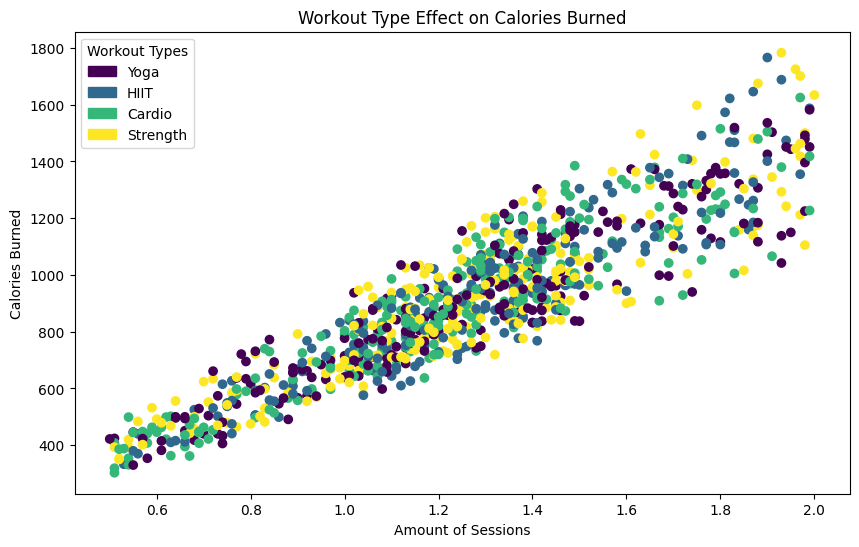

In [111]:
import matplotlib.patches as mpatches

# Define workout types and their corresponding colors
workout_types = df['Workout_Type'].unique()
print(workout_types)
workout_type_to_color = {wt: i for i, wt in enumerate(workout_types)}
t = df['Workout_Type'].map(workout_type_to_color)
print(t)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Session_Duration (hours)'], df['Calories_Burned'], c=t, alpha=1, cmap='viridis')
# Add labels and title
plt.xlabel('Amount of Sessions')
plt.ylabel('Calories Burned')
plt.title('Workout Type Effect on Calories Burned')

# Create a legend
# mpathes.Patch it would just create the legend
# scatter.map is the colormap from the cmap viridis which we set and map the normalized values to actual colors
# scatter.norm is to normalize the number from the workout_type_to_color to range 0 to 1
handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(workout_type_to_color[wt])), label=wt)
    for wt in workout_types
]

plt.legend(handles=handles, title="Workout Types", loc="upper left")  # Customize title and position

# Show the plot
plt.show()

In [115]:
# perform one-hot-encoding on categorical features
encoded_genders = pd.get_dummies(df_2['Gender'], prefix='Gender', drop_first=False).astype('int')
encoded_wt = pd.get_dummies(df_2['Workout_Type'], prefix='WT', drop_first=False).astype('int')

df_2 = pd.concat([df_2, encoded_genders, encoded_wt], axis=1)
df_2.drop(columns=['Gender', 'Workout_Type'], inplace=True)

df_2.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,WT_Cardio,WT_HIIT,WT_Strength,WT_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0,1,0,0,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,1,0,0,1,0,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1,0,1,0,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0,1,0,0,1,0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0,1,0,0,1,0


In [118]:
# drop unnecessary features
new_df_2 = df_2.drop(columns=['Resting_BPM', 'Height (m)', 'Experience_Level', 'BMI', 'Water_Intake (liters)'])

In [119]:
new_df_2.head()

,Age,Weight (kg),Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Gender_Female,Gender_Male,WT_Cardio,WT_HIIT,WT_Strength,WT_Yoga
0,56,88.3,180,157,1.69,1313.0,12.6,4,0,1,0,0,0,1
1,46,74.9,179,151,1.30,883.0,33.9,4,1,0,0,1,0,0
2,32,68.1,167,122,1.11,677.0,33.4,4,1,0,1,0,0,0
3,25,53.2,190,164,0.59,532.0,28.8,3,0,1,0,0,1,0
4,38,46.1,188,158,0.64,556.0,29.2,3,0,1,0,0,1,0


### Apply Standardization

In [120]:
# store the columns
columns = new_df_2.columns.tolist()
print(columns)
print(type(columns))

['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Workout_Frequency (days/week)', 'Gender_Female', 'Gender_Male', 'WT_Cardio', 'WT_HIIT', 'WT_Strength', 'WT_Yoga']
<class 'list'>


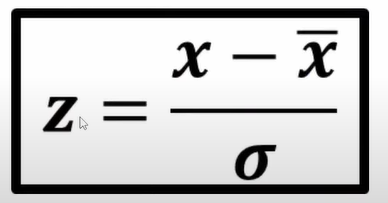

In [123]:
scaler = StandardScaler()
new_df_2 = scaler.fit_transform(new_df_2)

# note that here the df got converted to numpy array after being applied standardization 
print(type(new_df_2))

<class 'numpy.ndarray'>


In [124]:
# convert back to dataframe
new_df_2 = pd.DataFrame(new_df_2, columns=columns)

# as you can see here our mean and std(standard deviation becomes 1 which means there are no variables or features that are dominating to other features in scale)
new_df_2.describe().round(2)

,Age,Weight (kg),Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Gender_Female,Gender_Male,WT_Cardio,WT_HIIT,WT_Strength,WT_Yoga
count,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00,973.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.70,-1.60,-1.73,-1.66,-2.21,-2.21,-2.39,-1.45,-0.95,-1.05,-0.60,-0.54,-0.60,-0.57
25%,-0.88,-0.74,-0.86,-0.89,-0.63,-0.68,-0.59,-0.35,-0.95,-1.05,-0.60,-0.54,-0.60,-0.57
50%,0.11,-0.18,0.01,-0.05,0.01,-0.05,0.20,-0.35,-0.95,0.95,-0.60,-0.54,-0.60,-0.57
75%,0.85,0.57,0.88,0.85,0.59,0.63,0.69,0.74,1.05,0.95,1.68,-0.54,1.66,-0.57
max,1.67,2.64,1.66,1.76,2.17,3.22,1.60,1.84,1.05,0.95,1.68,1.84,1.66,1.75


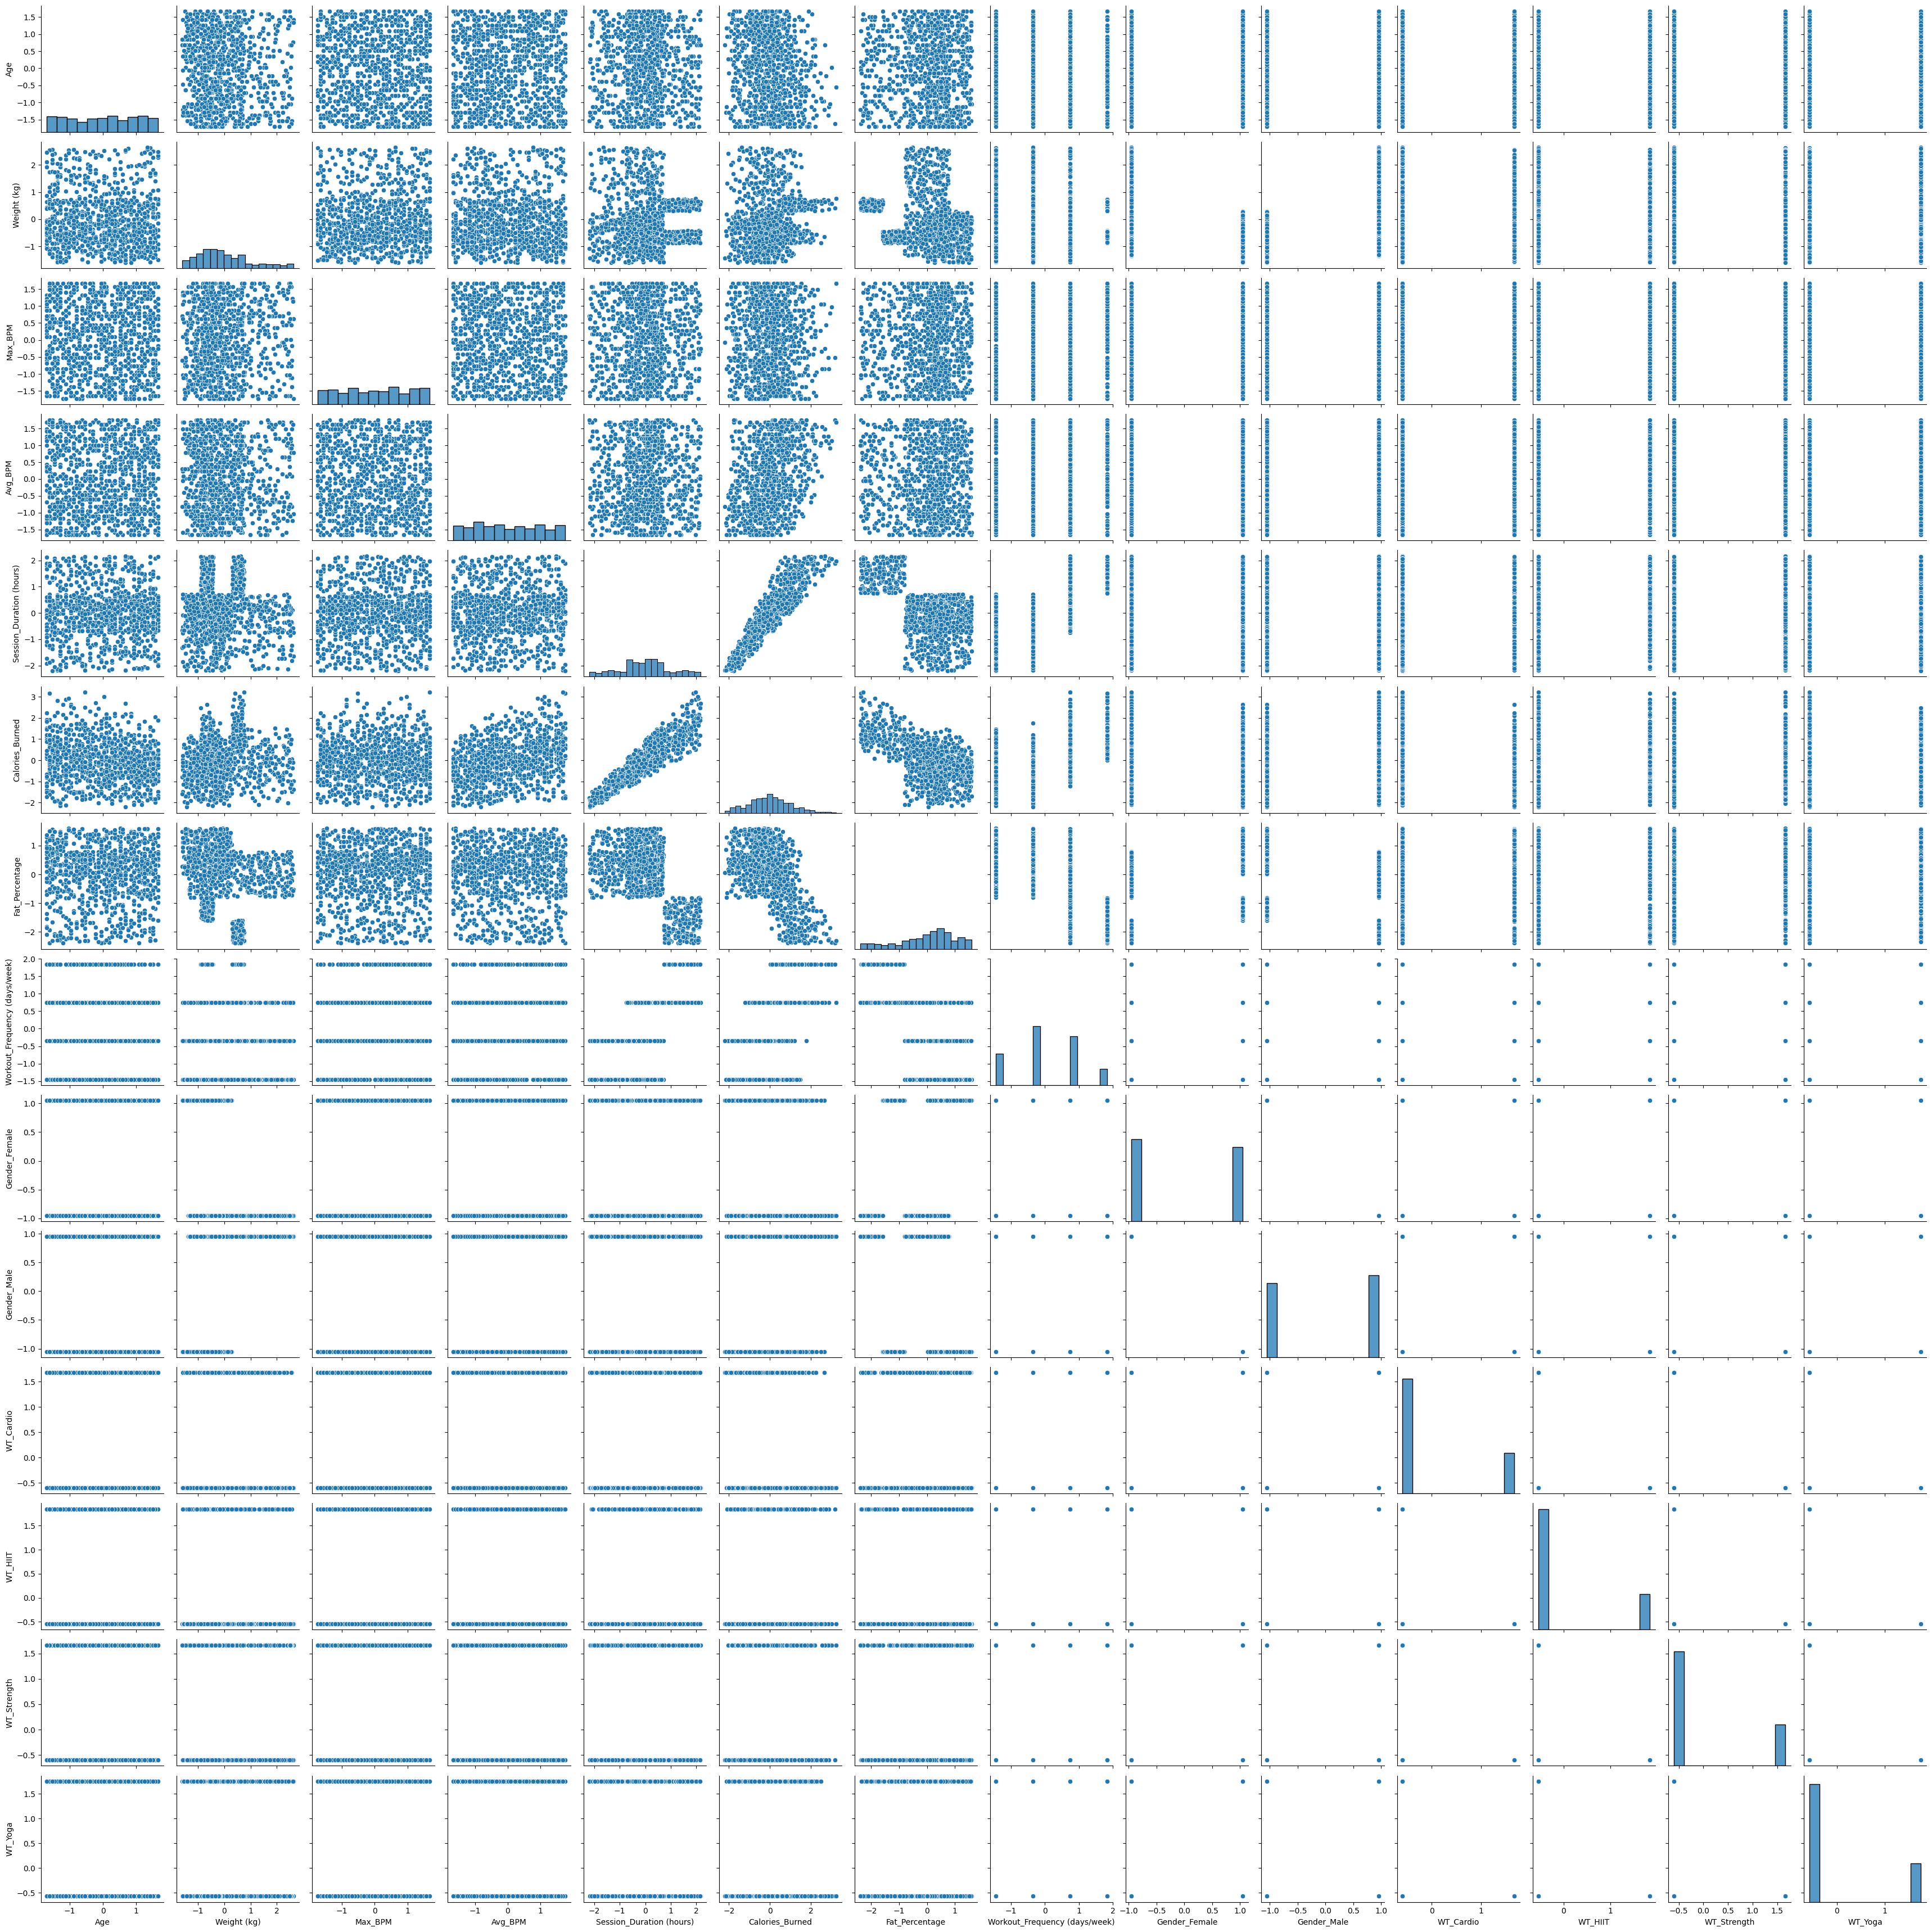

In [125]:
# visualize our data using pairplot from seaborn
# as we can see here the range changes to the min and max after getting standardized
sns.pairplot(new_df_2)

In [127]:
new_df_2

,Age,Weight (kg),Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Gender_Female,Gender_Male,WT_Cardio,WT_HIIT,WT_Strength,WT_Yoga
0,1.422343,0.681493,0.010081,0.922970,1.264598,1.495690,-1.978321,0.743295,-0.950847,0.950847,-0.595947,-0.542110,-0.600699,1.752464
1,0.600965,0.049316,-0.076726,0.504494,0.127098,-0.082284,1.426301,0.743295,1.051694,-1.051694,-0.595947,1.844645,-0.600699,-0.570625
2,-0.548964,-0.271491,-1.118414,-1.518142,-0.427068,-0.838243,1.346380,0.743295,1.051694,-1.051694,1.678001,-0.542110,-0.600699,-0.570625
3,-1.123928,-0.974433,0.878155,1.411193,-1.943735,-1.370351,0.611110,-0.352502,-0.950847,0.950847,-0.595947,-0.542110,1.664728,-0.570625
4,-0.056137,-1.309393,0.704540,0.992716,-1.797902,-1.282278,0.675047,-0.352502,-0.950847,0.950847,-0.595947,-0.542110,1.664728,-0.570625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.206066,0.624880,0.617733,0.992716,0.914598,1.682845,-2.393908,0.743295,-0.950847,0.950847,-0.595947,-0.542110,1.664728,-0.570625
969,-1.123928,-0.342257,0.357311,1.550685,0.360432,1.301196,0.003713,-1.448299,-0.950847,0.950847,-0.595947,-0.542110,1.664728,-0.570625
970,1.668756,-0.634756,1.225384,-1.657634,1.352098,0.086523,-0.987304,1.839092,1.051694,-1.051694,1.678001,-0.542110,-0.600699,-0.570625
971,-0.548964,2.478951,1.572614,0.155764,-0.456235,-0.082284,0.515205,-0.352502,-0.950847,0.950847,-0.595947,1.844645,-0.600699,-0.570625


### Apply PCA (Principal Component Analysis)

In [128]:
# after we apply standardization, that steps is crucial for PCA. In this datasets, even after dropping the obvious features like height, experience level, or etc in terms of predicting calories burned later in our model, our datasets still holds too high dimensionalities which we would like to reduce it by keeping the important features only by applying PCA

# Initiate PCA instance
pca = PCA(n_components=2) # lets try decompose our df to 2 features only
pca_df = pca.fit_transform(new_df_2)

# data after being applied PCA
# Convert the result into a DataFrame for easier readability
pca_df = pd.DataFrame(pca_df, columns=['Principal Component 1', 'Principal Component 2'])
print(pca_df)

# explained the variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Variance Ratio : ', explained_variance_ratio)

# check the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Ratio : ", cumulative_variance)

     Principal Component 1  Principal Component 2
0                -3.267840              -0.102571
1                 0.955769               1.338543
2                 1.895248               0.839418
3                 1.334199              -1.610243
4                 1.405539              -1.462059
..                     ...                    ...
968              -3.390646               0.094406
969              -0.906665              -0.582860
970              -0.604886               2.170631
971              -0.723272              -2.220988
972               1.278646              -2.544155

[973 rows x 2 columns]
Variance Ratio :  [0.22833836 0.16976071]
Cumulative Explained Ratio :  [0.22833836 0.39809906]


In [101]:
# splitting variables
y = new_df.iloc[:, 8] # dependent value
x = new_df.drop(columns=['Calories_Burned'], axis=1) # independent value
x

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week)
0,56,1,88.3,1.71,180,157,60,1.69,2,12.6,3.5,4
1,46,0,74.9,1.53,179,151,66,1.30,3,33.9,2.1,4
2,32,0,68.1,1.66,167,122,54,1.11,0,33.4,2.3,4
3,25,1,53.2,1.70,190,164,56,0.59,1,28.8,2.1,3
4,38,1,46.1,1.79,188,158,68,0.64,1,29.2,2.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1,10.0,3.5,4
969,25,1,66.6,1.61,184,166,56,1.38,1,25.0,3.0,2
970,59,0,60.4,1.76,194,120,53,1.72,0,18.8,2.7,5
971,32,1,126.4,1.83,198,146,62,1.10,3,28.2,2.1,3


In [102]:
y.sample(18)

468     779.0
529    1314.0
661     856.0
26      502.0
89      416.0
622    1355.0
30      964.0
84      744.0
325     714.0
343    1187.0
714    1060.0
354     442.0
353     525.0
297     979.0
317     742.0
411     440.0
956     838.0
694     909.0
Name: Calories_Burned, dtype: float64

In [103]:
# Splitting data into Train/Test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [104]:
# Model
regressor = LinearRegression()
regressor.fit(x_train, y_train) 

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

# valuate the accuracy of the model
r2_train = regressor.score(x_train, y_train)
r2_test = regressor.score(x_test, y_test)

print(f"R2 score on training data : {r2_train}")
print(f"R2 score on test data : {r2_test}")

Y train : 
1086.7517289374778
Y test : 
1067.3254548987936
